In [3]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target'].astype(np.uint8)
partition = 60000
X_train, X_test, y_train, y_test = X[:partition], X[partition:], y[:partition], y[partition:]

In [4]:
from sklearn.ensemble import RandomForestClassifier

random_forrest_classifier = RandomForestClassifier(n_jobs=16)
random_forrest_classifier.fit(X_train, y_train)

/home/codejamninja/.pyenv/versions/3.6.9/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=16,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

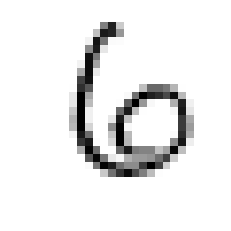

array([6], dtype=uint8)

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

x = X_test[100]
plt.imshow(x.reshape(28, 28), cmap='binary')
plt.axis('off')
plt.show()

random_forrest_classifier.predict([x])

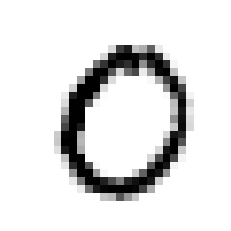

array([0], dtype=uint8)

In [8]:
x = X_test[101]
plt.imshow(x.reshape(28, 28), cmap='binary')
plt.axis('off')
plt.show()

random_forrest_classifier.predict([x])

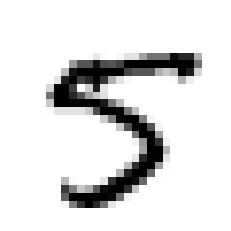

array([5], dtype=uint8)

In [9]:
x = X_test[102]
plt.imshow(x.reshape(28, 28), cmap='binary')
plt.axis('off')
plt.show()

random_forrest_classifier.predict([x])

In [14]:
from sklearn.model_selection import cross_val_predict

y_hat_train = cross_val_predict(random_forrest_classifier, X_train, y_train, cv=3)
y_hat_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [15]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_train, y_hat_train)
conf_matrix

array([[5797,    3,   12,    4,    7,   19,   35,    3,   40,    3],
       [   1, 6634,   34,   21,   10,    6,    7,   10,   14,    5],
       [  56,   20, 5637,   47,   35,   11,   37,   48,   54,   13],
       [  27,   24,  131, 5624,   10,  125,    6,   60,   83,   41],
       [  21,   16,   35,    9, 5549,    6,   37,   12,   26,  131],
       [  45,   19,   23,  179,   34, 4952,   58,    9,   52,   50],
       [  53,   13,   33,    3,   27,   77, 5689,    2,   20,    1],
       [  12,   34,   91,   25,   65,   10,    0, 5927,   10,   91],
       [  45,   59,  105,  127,   48,  107,   36,   18, 5236,   70],
       [  34,   16,   28,   98,  155,   39,   11,   89,   52, 5427]])

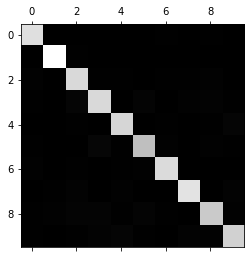

In [16]:
plt.matshow(conf_matrix, cmap=plt.cm.gray)
plt.show()

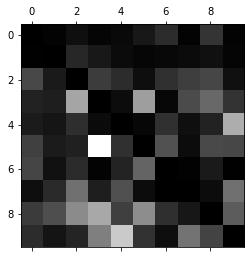

In [17]:
row_sums = conf_matrix.sum(axis=1, keepdims=True)
norm_conf_matrix = conf_matrix / row_sums
np.fill_diagonal(norm_conf_matrix, 0)

plt.matshow(norm_conf_matrix, cmap=plt.cm.gray)
plt.show()